In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rc, rcParams, style
#rcParams['text.usetex'] = True
#rc('font', **{'family': 'Times'})
#rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [55]:
ot_cheb_nodes[:n//2]

array([ 1.00000000e+00,  9.80785280e-01,  9.23879533e-01,  8.31469612e-01,
        7.07106781e-01,  5.55570233e-01,  3.82683432e-01,  1.95090322e-01,
        6.12323400e-17, -1.95090322e-01, -3.82683432e-01, -5.55570233e-01,
       -7.07106781e-01, -8.31469612e-01, -9.23879533e-01, -9.80785280e-01])

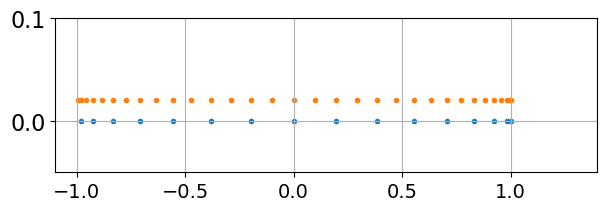

In [79]:
n1 = 16
n2 = 32
ot_cheb_nodes_n1 = np.cos((2 * np.arange(n1)) * np.pi / (2 * n1))
ot_cheb_nodes_n2 = np.cos((2 * np.arange(n2)) * np.pi / (2 * n2))

plt.figure(figsize=(7, 2))
plt.scatter(ot_cheb_nodes_n1, [0] * n1, marker=".", color="C0")
plt.scatter(ot_cheb_nodes_n2, [0.02] * n2, marker=".", color="C1")
plt.xlim((-1.1, 1.4))
plt.ylim((-0.05, 0.1))
plt.grid(True);

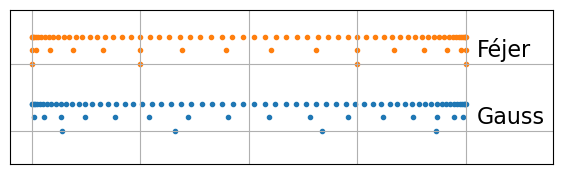

In [46]:
n = 4
method = 2
gauss_legendre_nodes_0 = np.array(ot.GaussLegendre([n]).getNodes())
gauss_legendre_nodes_0 = gauss_legendre_nodes_0 * 2 - 1
fejer_nodes_0 = ot.FejerAlgorithm([n], method).getNodes()
#
n1 = 16
gauss_legendre_nodes_1 = np.array(ot.GaussLegendre([n1]).getNodes())
gauss_legendre_nodes_1 = gauss_legendre_nodes_1 * 2 - 1
fejer_nodes_1 = ot.FejerAlgorithm([n1], method).getNodes()
#
n2 = 64
gauss_legendre_nodes_2 = np.array(ot.GaussLegendre([n2]).getNodes())
gauss_legendre_nodes_2 = gauss_legendre_nodes_2 * 2 - 1
fejer_nodes_2 = ot.FejerAlgorithm([n2], method).getNodes()


plt.figure(figsize=(7, 2))
plt.scatter(gauss_legendre_nodes_0, [0] * n, marker=".", color="C0")
plt.scatter(gauss_legendre_nodes_1, [0.02] * n1, marker=".", color="C0")
plt.scatter(gauss_legendre_nodes_2, [0.04] * n2, marker=".", color="C0")

plt.scatter(fejer_nodes_0, [0.1] * n, marker=".", color="C1")
plt.scatter(fejer_nodes_1, [0.12] * n1, marker=".", color="C1")
plt.scatter(fejer_nodes_2, [0.14] * n2, marker=".", color="C1")


plt.text(1.05, 0.01, "Gauss")
plt.text(1.05, 0.11, "Féjer")
plt.xlim((-1.1, 1.4))
plt.ylim((-0.05, 0.18))

plt.tick_params(
    axis='both',
    which='both', 
    bottom=False,
    left=False,
    labelleft=False,
    top=False, 
    labelbottom=False
    )
plt.grid(True)
plt.savefig("figures/univariate_quadratures.png", dpi=300, bbox_inches='tight', transparent=True);